In [22]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
from datetime import datetime
from sklearn import linear_model

In [4]:
df = pd.read_csv('delhi_aqi.csv')

In [5]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


<AxesSubplot:xlabel='date'>

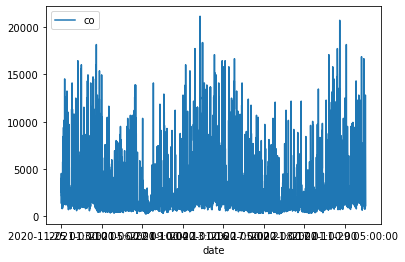

In [8]:
df.plot(x='date', y = 'co')

<AxesSubplot:xlabel='date'>

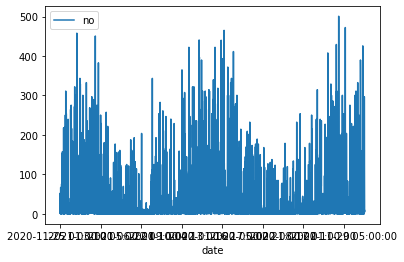

In [9]:
df.plot(x='date', y = 'no')

<AxesSubplot:xlabel='date'>

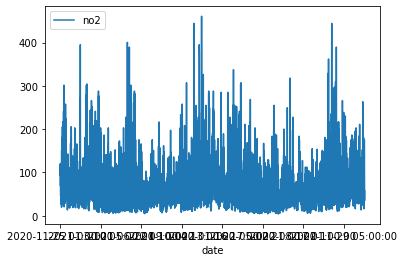

In [10]:
df.plot(x='date', y = 'no2')

<AxesSubplot:xlabel='date'>

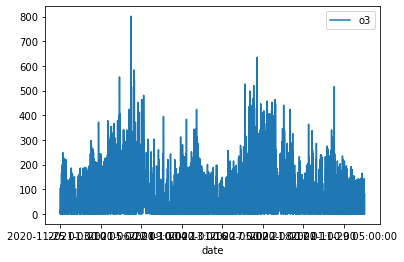

In [12]:
df.plot(x='date', y = 'o3')

In [16]:
df.nlargest(5, columns=['o3'])

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
4376,2021-05-27 09:00:00,2403.26,0.80,32.22,801.09,188.83,521.81,564.21,21.79
4377,2021-05-27 10:00:00,2376.56,0.75,36.33,789.64,177.38,501.19,544.94,22.80
4378,2021-05-27 11:00:00,2563.48,0.73,52.09,778.20,192.64,514.48,560.03,24.57
4375,2021-05-27 08:00:00,2483.37,0.96,33.24,766.75,196.46,518.81,559.86,20.77
4379,2021-05-27 12:00:00,2883.91,0.52,70.60,743.87,204.09,520.84,568.65,25.08


In [18]:
df.isna().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [19]:
df.info

<bound method DataFrame.info of                       date       co     no     no2     o3     so2   pm2_5  \
0      2020-11-25 01:00:00  2616.88   2.18   70.60  13.59   38.62  364.61   
1      2020-11-25 02:00:00  3631.59  23.25   89.11   0.33   54.36  420.96   
2      2020-11-25 03:00:00  4539.49  52.75  100.08   1.11   68.67  463.68   
3      2020-11-25 04:00:00  4539.49  50.96  111.04   6.44   78.20  454.81   
4      2020-11-25 05:00:00  4379.27  42.92  117.90  17.17   87.74  448.14   
...                    ...      ...    ...     ...    ...     ...     ...   
18771  2023-01-24 04:00:00  1762.39   4.64   37.01  33.26   30.52  231.15   
18772  2023-01-24 05:00:00  1735.69   6.82   34.96  46.49   34.33  225.08   
18773  2023-01-24 06:00:00  1922.61   8.16   40.10  56.51   43.39  242.49   
18774  2023-01-24 07:00:00  1361.85   9.05   52.78  71.53  100.14  165.67   
18775  2023-01-24 08:00:00  1134.87   8.61   56.89  80.11  110.63  123.76   

         pm10    nh3  
0      411.73  28.63

In [20]:
df.dtypes

date      object
co       float64
no       float64
no2      float64
o3       float64
so2      float64
pm2_5    float64
pm10     float64
nh3      float64
dtype: object

In [26]:
reg = linear_model.LinearRegression()
#reg.fit(x,y) #target variable will be nh3
reg.fit(df[['co', 'no', 'no2']], df.nh3)

LinearRegression()

In [28]:
#Take a look at the coefficients - expect all positive correlation
reg.coef_

array([0.0008817 , 0.17096652, 0.2291499 ])

In [29]:
#Take a look at the intercept
reg.intercept_

1.5976602630414547